# What is Supervised learning?
Supervised learning is a type of machine learning where a model is trained **using labeled data**. This means the dataset contains **input-output pairs** where the target variable (output) is known. The goal is to learn a mapping from inputs (features) to outputs (targets) so the model can **predict the target for unseen data**.
Supervised learning is broadly categorized into:

* **Regression**: Predicting continuous values (e.g., house prices, temperatures).
  
* **Classification**: Predicting discrete labels (e.g., cold vs hot).

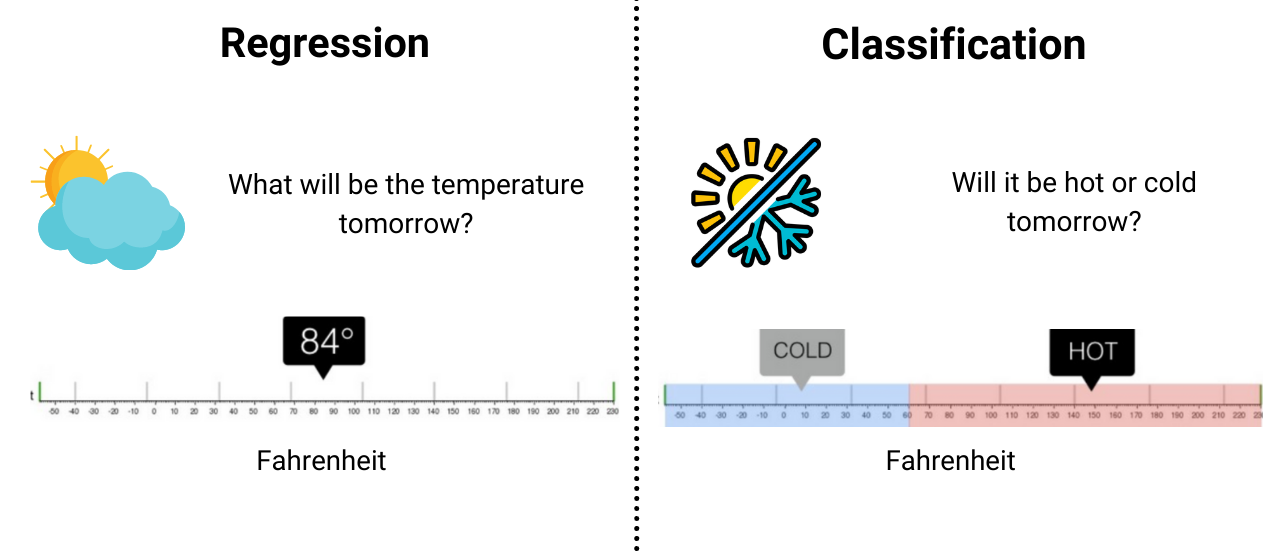

#   Understanding Regression
Regression is a statistical and machine learning approach to **model the relationship** between a dependent variable (target) and one or more independent variables (features). The goal is to predict continuous values, such as sales, prices, or temperatures.

Here are the different types of regression algorithms:

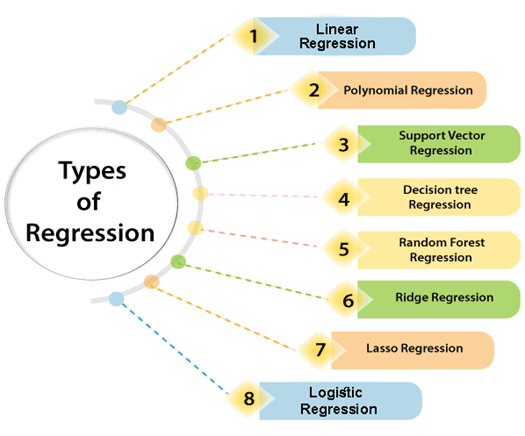

example dataset: https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression
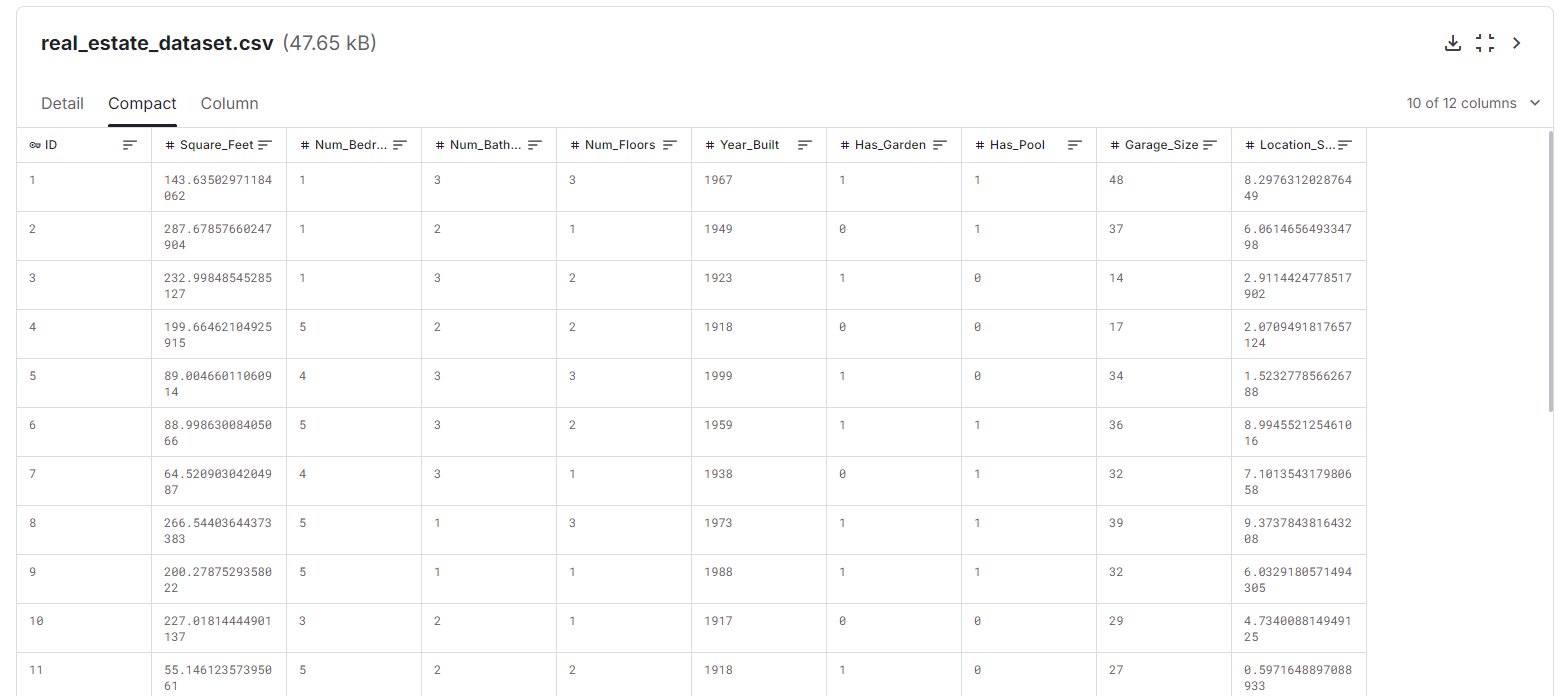

## **Simple Regression**
* Used to predict a continuous dependent variable based on a single independent variable.
* Simple linear regression should be used when there is only a single independent variable.

## **Multiple Regression**
* Used to predict a continuous dependent variable based on multiple independent variables.
* Multiple linear regression should be used when there are multiple independent variables.

## **NonLinear Regression**
* Relationship between the dependent variable and independent variable(s) follows a nonlinear pattern.
* Provides flexibility in modeling a wide range of functional forms.

## Exercise
* What is the core difference between regression and classification?
* What is the most commonly used dataset file format?
* What is the core difference between simple regression and non-linear regression?

# Some basic Regression Algorithms
## Linear Regression
Linear Regression is the simplest form of regression. It models the relationship between the dependent variable (
y) and one or more independent variables (X) using a straight line:

**y = b1X + b0 + e**                                                

* b0: intercept
* b1: coefficient
* e: error
  
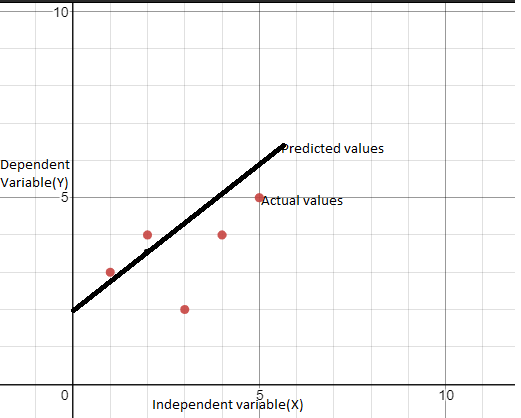

MSE: 0.00, MAE: 0.00


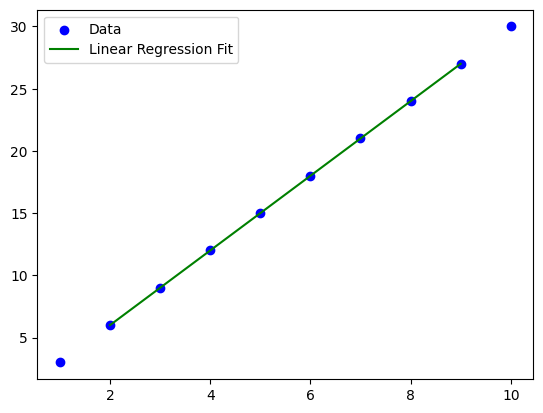

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a DataFrame
np.random.seed(42)

# Manually define X and y
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # 10 samples, 1 feature
y = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])  # y = 3 * X + some noise

# Convert to DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

# Visualization
plt.scatter(data['X'], data['y'], color='blue', label='Data')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Fit')
plt.legend()
plt.show()

## Polynomial Regression
Polynomial Regression extends Linear Regression by fitting a polynomial equation of degree 𝑛:

**y= b0 + b1x1 + b2x12 + b2x13 +...... bnx1n**

* b0: intercept
* b1: coefficient
* n: degree
  
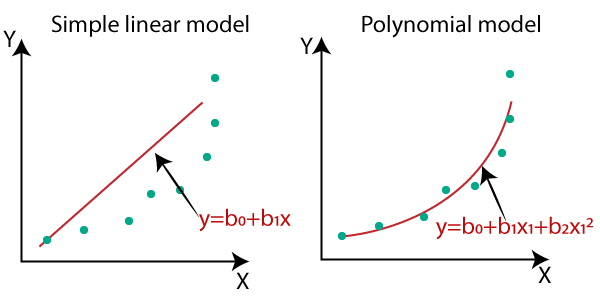

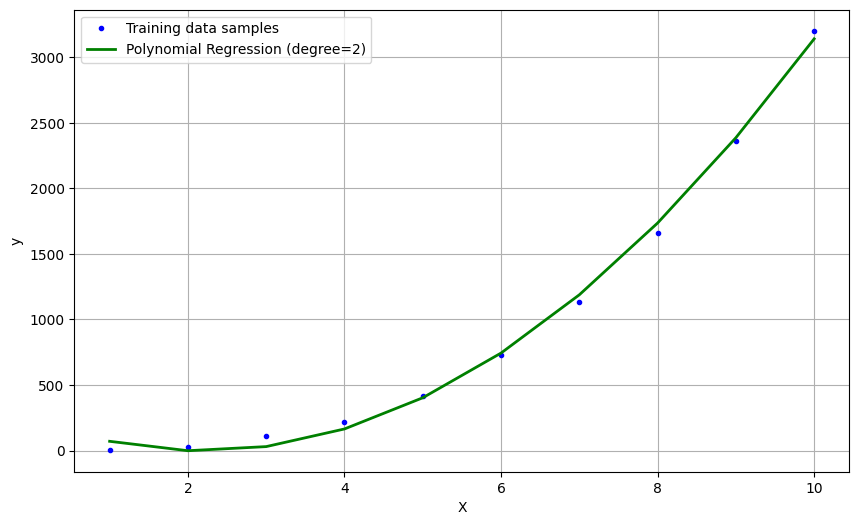

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Manually define X and y with a polynomial relationship
np.random.seed(42)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # 10 samples, 1 feature
y = 5 * np.sin(X) + 10 * np.cos(2 * X) + 3 * X**3 + 2 * X**2 + 1 + np.random.randn(10, 1)  # Polynomial + noise

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=2)  # Degree 2 polynomial
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the Polynomial Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict
# X_new = np.sort(X, axis=0)  # Sort X for smooth curve
X_new_poly = poly_features.transform(X)
y_pred = lin_reg.predict(X_new_poly)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, y, 'b.', label='Training data samples')
ax.plot(X, y_pred, 'g-', linewidth=2, label='Polynomial Regression (degree=2)')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)
plt.show()

https://www.desmos.com/calculator/y2op4nbutg

## Support Vector Regression (SVR)
SVR is a regression technique based on the concept of Support Vector Machines (SVMs). It aims to find the best-fit line or hyperplane that captures the relationship between the input features and the output variable, while minimizing the error by controlling the margin.

**y = f(X) + e**

* y: Predicted output
* f(X): The regression function
* e: A small threshold for error (insensitivity tube), allowing some deviation from the true target value.

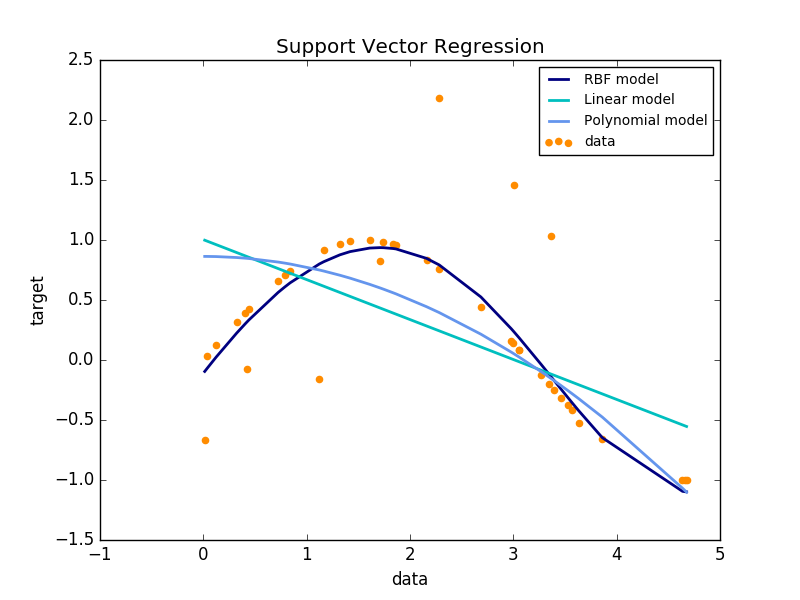

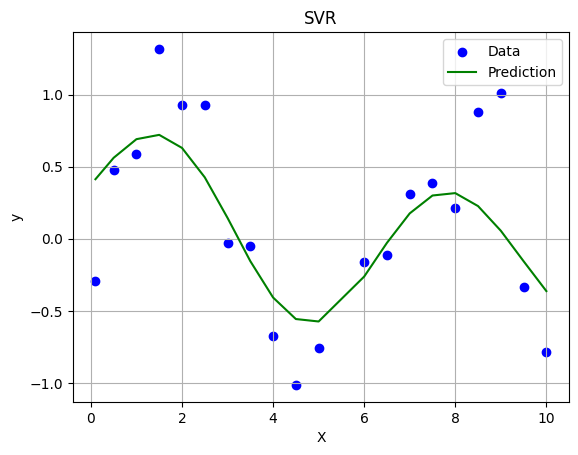

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Manually creating the data
data = pd.DataFrame({
    'X': np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
                   6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]),
    'y': np.sin(np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
                         6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])) +
         0.3 * np.random.randn(20)  # Adding noise
})

# SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Train the model
svr.fit(data[['X']], data['y'])

# Make predictions
data['y_pred'] = svr.predict(data[['X']])

# Plot the data and predictions
plt.scatter(data['X'], data['y'], color='blue', label='Data')
plt.plot(data['X'], data['y_pred'], color='green', label='Prediction')
plt.legend()
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR')
plt.show()

## Exercise
* If the Linear Regression line does not pass through most of the data points, does it mean the model is bad? Why or why not?
* What is the core difference between polynomial and linear regression?
* How many kernels are there in SVR?

# Polynomial Regression Project.
## Importing the dataset:
* Open https://www.kaggle.com/, and **create a new notebook**.
* Under **Notebook** Section you will see *Input*

   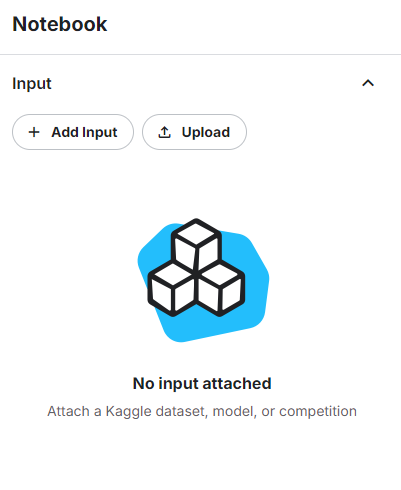

* **Upload or add input** from the existing datasets within kaggle.

## Importing the datasets into the notebook:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('/kaggle/input/ice-cream-selling-data/Ice_cream selling data.csv')  # Replace with the path to your dataset
print(data.tail(10))
# Display the first few rows of the dataset
data.head(15)

    Temperature (°C)  Ice Cream Sales (units)
39          3.020874                20.114413
40          3.211366                22.839406
41          3.270044                16.983279
42          3.316073                25.142082
43          3.335932                26.104740
44          3.610778                28.912188
45          3.704057                17.843957
46          4.130868                34.530743
47          4.133534                27.698383
48          4.899032                41.514822


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


## Dataset Overview:
* Let's display the first few rows to understand the structure of the data.

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64


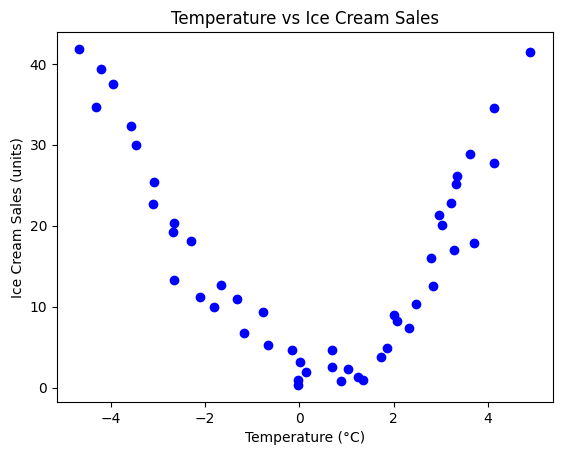

In [3]:
# Check for null values
print(data.isnull().sum())

# Scatter plot of temperature vs ice cream sales
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'], color='blue')
plt.title('Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

## Selecting features and targets:

In [4]:
# Define features and target
X = data[['Temperature (°C)']].values  # Independent variable
y = data['Ice Cream Sales (units)'].values  # Dependent variable

In [25]:
# Transform features to polynomial features of degree 2
degree = 15
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
print("Transformed features:\n", X_poly)

Transformed features:
 [[ 1.00000000e+00 -4.66226268e+00  2.17366933e+01 -1.01342174e+02
   4.72483834e+02 -2.20284375e+03  1.02702362e+04 -4.78825388e+04
   2.23240974e+05 -1.04080806e+06  4.85252057e+06 -2.26237256e+07
   1.05477751e+08 -4.91764983e+08  2.29273753e+09 -1.06893446e+10]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01 -8.04290944e+01
   3.47176967e+02 -1.49861002e+03  6.46883923e+03 -2.79231291e+04
   1.20531847e+05 -5.20282881e+05  2.24583199e+06 -9.69426728e+06
   4.18458810e+07 -1.80630233e+08  7.79701138e+08 -3.36562631e+09]
 [ 1.00000000e+00 -4.21398476e+00  1.77576676e+01 -7.48305407e+01
   3.15334758e+02 -1.32881587e+03  5.59960982e+03 -2.35966705e+04
   9.94360099e+04 -4.19021831e+05  1.76575161e+06 -7.44085039e+06
   3.13556302e+07 -1.32132148e+08  5.56802858e+08 -2.34635876e+09]
 [ 1.00000000e+00 -3.94966109e+00  1.55998227e+01 -6.16140128e+01
   2.43354469e+02 -9.61167676e+02  3.79628657e+03 -1.49940454e+04
   5.92213975e+04 -2.33904449e+05  9.23843302e+05 

## Train Test Split:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

## Polynomial Regression:
we are using the ice_cream selling data.csv, for polynomial regression and the input features will be 

In [26]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Visualization: 

In [1]:
# Scatter plot of original data
plt.scatter(X, y, color='blue', label='Original Data')

# Line plot of predictions
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
y_seq_pred = model.predict(X_seq_poly)

plt.plot(X_seq, y_seq_pred, color='red', label=f'Polynomial Degree {degree}')
plt.title('Polynomial Regression Fit')
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [46]:
print(X_Sorted)

[[ 1]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]]


The graph shows the relationship between the weight of the fish (x-axis) and its length (y-axis). The blue dots represent the actual data points from the dataset.

The red curve is the polynomial regression model's prediction of the fish length based on its weight.

## Error Metrics:
* **Mean Squared Error** (MSE):
Measures the average squared difference between actual and predicted values. Penalizes larger errors more than smaller ones.

* **Mean Absolute Error** (MAE):
Measures the average absolute difference between actual and predicted values. Easier to interpret.

* **Root Mean Squared Error** (RMSE):
Square root of MSE, giving an error value in the same unit as the target variable.

In [21]:
# Make predictions on test data
y_test_pred = model.predict(X_test)

# Calculate error metrics on training data
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate error metrics on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training Root Mean Squared Error: {rmse_train}")
print(f"Training Mean Absolute Error: {mae_train}")

print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing Root Mean Squared Error: {rmse_test}")
print(f"Testing Mean Absolute Error: {mae_test}")

Mean Squared Error: 10.924895911845207
Root Mean Squared Error: 3.305283030520262
Mean absolute error: 2.536155319219787


## Exercise
* Run the same model with different degrees (e.g., 2, 5, 15).
* What can be the potential features in this dataset?
* What is the utility of polynomialfeatures()?
* How much of data are we spliting to training data and test data?


Input your own dataset here after clicking on copy&edit option from the notebook and add a dataset here and perform linear regression to it.
(Please update the file name to "Your_Name_Regression" and DM me the link!!)